# Calibration Vol Sto

https://www.youtube.com/watch?v=Jy4_AVEyO0w&list=PLqpCwow11-Oqn3f9znHpQRBFUPnXo8t-D&index=2

On sait que le modèle d'Heston est le suivant sous real world measure:  
  
$\large dS_t = \mu S_t dt + \sqrt{v_t} S_t dW^\mathbb{P}_{1,t}$  
$\large dv_t = \kappa (\theta – v_t)dt + \sigma \sqrt{v_t} dW^\mathbb{P}_{2,t}$  
$\large \rho dt = dW^\mathbb{P}_{2,t} dW^\mathbb{P}_{2,t}$  

D'après le théorème de Girsanov afin de $\mathbb{P} \to \mathbb{Q}$:  
  
$\large dW^\mathbb{Q}_{S,t} = dW^\mathbb{P}_{S,t} + \alpha_S dt, \alpha_S  = \frac{\mu_\mathbb{P}-r}{\sqrt{v_t}}$  
$\large dW^\mathbb{Q}_{v,t} = dW^\mathbb{P}_{v,t} + \alpha_v dt, \alpha_v  = \frac{\lambda}{\sigma^\mathbb{P}} \sqrt{v_t}$

Source : https://quant.stackexchange.com/questions/61927/heston-stochastic-volatility-girsanov-theorem/61931#61931

Ainsi nous avons:  
$\large dS_t = r S_t dt + \sqrt{v_t} S_t dW^\mathbb{Q}_{1,t}$  
$\large dv_t = \kappa^\mathbb{Q} (\theta^\mathbb{Q} – v_t)dt + \sigma \sqrt{v_t} dW^\mathbb{Q}_{2,t}$  
$\large \rho^\mathbb{Q} dt = dW^\mathbb{Q}_{2,t} dW^\mathbb{Q}_{2,t}$  
$\large \rho^\mathbb{Q} = \rho, \kappa^\mathbb{Q} = \kappa+\lambda,  \theta^\mathbb{Q} = \kappa \theta/(\kappa+\lambda)$ Avec $\lambda$ qui est la variance risk premium.

Notation:
- $\kappa$ Vitesse de retour à $\theta$.
- $\theta$ Variance moyenne.
- $v_0$ Initial variance.
- $\sigma$ Volatility de la variance.
- $\rho$ Correlation.

Source utilisé:  https://calebmigosi.medium.com/build-the-heston-model-from-scratch-part-i-17bde00122a0

## Calculating Price of Vanilla Option

La logique derrière la calibration est qu'avec le modèle d'Heston nous pouvons pricer le prix d'une option vanille avec une formule fermé. Ainsi, nous allons pricer les vanilles avec Hestons avant de réduire aux maximums mon $\epsilon$ qui représente l'écart de prix.

On sait que:  
$$C = S_tN(d_1) - Ke^{-rt}N(d_2)$$  

Avec:     
$$d_1 = \frac{ln \left(\frac{S_t}{K}\right) +  \left( r + \frac{\sigma ^ 2}{2} \right) (T-t)}{\sigma \sqrt{(T-t)}}$$
$$d_2 = d_1 - \sigma t$$

and $N$ is the cumulative distribution function for a normal random variable. 

Avec Heston la formule pour calculer le prix d'un Call est :  
$$C = S_tP_1(S_T > K) - Ke^{-rt}P_2(S_T > K)$$

Avec $P_1$, $P_2$ et $x = ln S_t$:  
$$P_1 = \frac{1}{2} + \frac{1}{\pi} \int_0^{\infty} Re\left[\frac{e^{-is \,ln K} f_1(s,\nu, x)}{is}\right]ds$$
$$P_2 = \frac{1}{2} + \frac{1}{\pi} \int_0^{\infty} Re\left[\frac{e^{-is \,ln K} f_2(s,\nu, x)}{is}\right]ds$$

Détail des éléments de $P_1$ et $P_2$:
- $Re$ signifie que nous ne prendrons que la partie réel du résutlat
- $f_j = e^{\large (C_j(\tau,s) + D_j(\tau,s)v + isx)}$
- $C_j(\tau, s) = r.i.s.\tau + \frac{\kappa  \theta}{\sigma^2}\left[ (BRS).\tau - 2 ln \left(\frac{1 - g_j.e^{d_j.\tau}}{1 - g_j}\right)\right]$
- $D_j = \frac{BRS}{\sigma^2} \left(\frac{1 - e^{d_j.\tau}}{1 - g_j.e^{d_j.\tau}} \right)$
- $BRS = b_j - \rho.\sigma.i.s + d_j$
- $x = ln(S_t)$
- $d_j = \sqrt{(\rho.\sigma.i.x)^2 - \sigma^2(is - s^2)}$
- $g_j = \frac{b_j - \rho\sigma is + d_j}{b_j - \rho\sigma is - d_j}$  
- $b_1 = \kappa-\rho\sigma$
- $b_2 = \kappa$

Ainsi je dois faire 2 intégrals et je dois réaliser ces opération 2 fois car chaque paramètre change selon si on calcul $P_1$ ou $P_2$. Cepandant il est possible de fusionner ces 2 intégrales en une seule :

### Démonstration Fusion Integral

So we'll start by noting that:

$$C = S_t .\left[\frac{1}{2} + \frac{1}{\pi} \int_0^{\inf} Re\left[\frac{e^{-is \,ln K} f_1(s,\nu, x)}{is}\right]ds\right] - Ke^{-r\tau}\left[\frac{1}{2} + \frac{1}{\pi} \int_0^{\inf} Re\left[\frac{e^{-is \,ln K} f_2(s,\nu, x)}{is}\right]ds\right]$$

We extract the $1/2$ from the combined $P$ functions:

$$C = \frac{1}{2}(S_t - Ke^{-r\tau}) +\left[\frac{S_t}{\pi} \int_0^{\inf} Re\left[\frac{e^{-is \,ln K} f_1(s,\nu, x)}{is}\right]ds - \frac{Ke^{-r\tau}}{\pi} \int_0^{\inf} Re\left[\frac{e^{-is \,ln K} f_2(s,\nu, x)}{is}\right]ds\right]$$


We also note that $e^{-is \,ln K}$ is basically $e^{ln K^{-is}}$ which can also be simplified to $K^{-is}$ or $\frac{1}{K^{is}}$. We can therefore represent our call option formula as:

$$C = \frac{1}{2}(S_t - Ke^{-r\tau}) +\frac{1}{\pi}\left[S_t \int_0^{\infty} Re\left[\frac{f_1(s,\nu, x)}{is. K^{iu}}\right]ds - Ke^{-r\tau} \int_0^{\inf} Re\left[\frac{f_2(s,\nu, x)}{is.K^{iu}}\right]ds\right]$$

We can then put the expression in one integral:

$$C = \frac{1}{2}(S_t - Ke^{-r\tau}) +\frac{1}{\pi}\int_0^{\infty} Re\left[S_t \frac{f_1(s,\nu, x)}{is. K^{iu}} - Ke^{-r\tau} \frac{f_2(s,\nu, x)}{is.K^{iu}}\right]ds$$

From this point we can expand the expression for f:

$$f_j(s,\nu, x) = exp(C_j(\tau, s) + D_j(\tau, s).\nu + i.s.x)$$

Expanded out, f is defined as:

$$f_j(s,\nu, x) = exp\left(r.i.s.\tau + \frac{\kappa  \theta}{\sigma^2}\left[ (BRS).\tau - 2 ln \left(\frac{1 - g_j.e^{d_j.\tau}}{1 - g_j}\right)\right] + \frac{BRS}{\sigma^2} \left(\frac{1 - e^{d_j.\tau}}{1 - g_j.e^{d_j.\tau}} \right).\nu + i.s.x\right)$$

$$where \,BRS = b_j - \rho.\sigma.i.s + d_j$$

We can extract the first exponential of the `fHeston` function since:

$$f_j(s,\nu, x) = exp\left(r.i.s.\tau + i.s.x \right ) \times exp\left(\frac{-2\kappa  \theta}{\sigma^2} ln \left(\frac{1 - g_j.e^{d_j.\tau}}{1 - g_j}\right)\right)
\times exp\left(BRS \frac{\kappa  \theta}{\sigma^2}\right)  \times exp\left( \frac{BRS}{\sigma^2} \left(\frac{1 - e^{d_j.\tau}}{1 - g_j.e^{d_j.\tau}} \right).\nu \right)$$

Starting with the left most part, we obtain the same expression as `fHeston`:

$$exp\left(r.i.s.\tau + i.s.x \right ) = e^{r.i.s.\tau} e^{i.s.ln S_t} = e^{r.i.s.\tau} S_t^{i.s}$$

The second element we obtain is:

$$exp\left(\frac{-2\kappa  \theta}{\sigma^2} ln \left(\frac{1 - g_j.e^{d_j.\tau}}{1 - g_j}\right)\right) = exp\left(ln \left(\frac{1 - g_j.e^{d_j.\tau}}{1 - g_j}\right)\times{\frac{-2\kappa  \theta}{\sigma^2}}\right) = \left(\frac{1 - g_j.e^{d_j.\tau}}{1 - g_j}\right) ^ {\frac{-2\kappa  \theta}{\sigma^2}}$$

The final part is simply rearranged:

$$exp\left(BRS \frac{\kappa  \theta}{\sigma^2}\right)  \times exp\left( \frac{BRS}{\sigma^2} \left(\frac{1 - e^{d_j.\tau}}{1 - g_j.e^{d_j.\tau}} \right).\nu \right) = exp\left(BRS \frac{\kappa  \theta}{\sigma^2} +  \frac{BRS.\nu }{\sigma^2} \left(\frac{1 - e^{d_j.\tau}}{1 - g_j.e^{d_j.\tau}} \right)\right)$$

So putting everything together:

$$f_j(s,\nu, x) = e^{r.i.s.\tau} S_t^{i.s} \left(\frac{1 - g_j.e^{d_j.\tau}}{1 - g_j}\right) ^ {\frac{-2\kappa  \theta}{\sigma^2}}exp\left(BRS \frac{\kappa  \theta}{\sigma^2} +  \frac{BRS.\nu }{\sigma^2} \left(\frac{1 - e^{d_j.\tau}}{1 - g_j.e^{d_j.\tau}} \right)\right)$$

### Simplified Closed Formed Heston Formula

Ainsi, la formule d'heston pour calculer le prix d'un call est:  
$$C = \frac{1}{2}(S_t - Ke^{-r(T-t)}) + \frac{1}{\pi} \int_0^{\infty}Re\left[ e^{r(T-t)}\frac{f(s-i)}{is K^{is}} - K\frac{f(s)}{is K^{is}}\right] ds$$
$$where:$$
$$f(x) = e^{ixrT}S_t^{ix} \left(\frac{1 - ge^{d\tau}}{1 - g}\right)^{\frac{-2\kappa \theta}{\sigma^2}} \times 
exp{\left[\frac{\tau\kappa \theta}{\sigma^2} (\kappa - \sigma\rho ix- d) + \frac{\nu}{\sigma^2} (\kappa - \sigma\rho ix- d) \frac{1 - e^{d_j\tau}}{1 - g_je^{d_j\tau}}\right]}$$
$$and$$
$$d = \sqrt{(\rho\sigma ix)^2 - \sigma^2(2ix - x^2)}$$
$$g = \frac{\kappa - \rho\sigma ix + d}{\kappa - \rho\sigma ix - d}$$  

Nous allons nommé $f(x)$ `fHeston` dans notre code.

#### 1. Calculating $f(x)$ `fHeston`

In [6]:
import numpy as np

def fHeston(x, S, K, r, T, rho, sigma, kappa, theta, vol_vol):
	i = complex(0,1)
	psix = rho * sigma * i * x
	d = _get_fHeston_d(x, psix, kappa, sigma)
	g = _get_fHeston_g(psix, kappa, d)

	exp1 = _get_fHeston_firstE(x, S, r, T, sigma, kappa, theta, d, g)
	exp2 = _gett_fHeston_secondE(T, sigma, kappa, theta, vol_vol, psix,d,g)
	return (exp1 * exp2)


def _get_fHeston_d(x, psix, kappa, sigma):
    i = complex(0,1)
    d1 = (psix - kappa)**2
    d2 = (sigma**2) * (i*x + x**2)
    return np.sqrt(d1 + d2)

def _get_fHeston_g(psix, kappa, d):
    g1 = kappa - psix - d
    g2 = kappa - psix + d
    return (g1/g2)

def _get_fHeston_firstE(x, S, r, T, sigma, kappa, theta, d, g):
    i = complex(0,1)
    exp1 = np.exp(np.log(S) * i *x) * np.exp(i * x*r*T)
    exp2 = 1 - g * np.exp(-d *T)
    exp3 = 1- g
    return exp1*np.power(exp2/exp3, -2*theta*kappa/(sigma **2))

def _gett_fHeston_secondE(T,sigma, kappa, theta, vol_vol, psix, d, g):
	exp4 = theta * kappa * T/(sigma **2)
	exp5 = vol_vol/(sigma **2)
	exp6 = (1 - np.exp(-d * T))/(1 - g * np.exp(-d * T))
	return np.exp((exp4 * (kappa - psix - d)) + (exp5 * (kappa - psix - d) * exp6))

Maintenant que nous avons avons calculer $f(x)$ il nous faut résoudre l'intégral. Le problème est que si on va de 0 à l'infini, ça prendra trop de temps. Un partir d'un certain seul la valeur de l'intégral n'augmente que faiblement, elle converge, ainsi nous allons aller de 0 à 100 (vérifié plus tard dans le note book).

#### 2. Calculating the Intergal  `SumHeston`

$$C = \frac{1}{2}(S_t - Ke^{-r(T-t)}) + \frac{1}{\pi} \int_0^{\infty}Re\left[\color{red}e^{r(T-t)}\color{default}\frac{f(x-i)}{ix K^{ix}} - K\frac{f(x)}{is K^{ix}}\right] dx$$  
Dans la formule que j'ai trouvé la partie en rouge à disparu ce qui m'a permis de faire la modife suivante (**demander/regarder pourquoi ils l'ont enlevé**):
$$C = ... \int_0^{\infty}Re\left[\frac{f(x-i)}{ix K^{ix}} - \frac{Kf(x)}{is K^{ix}}\right] dx$$
$$C = ... \int_0^{\infty}Re\left[\frac{f(x-i) \times Kf(s)}{is K^{ix}}\right] dx$$  
Pour calculer l'intégrale nous allons calculer la surface des rectangles sous ma courbe.

In [7]:
def SumHeston(S,K,r,T,rho,sigma,kappa,theta, vol_vol, split_by:float = 1000, upper_bound:float = 100):
    Area, i = 0, complex(0,1)
    dx = (upper_bound)/split_by
    
    for j in range(1,split_by):
        borne1 = dx * (2*j+1)/2
        borne2 = borne1 - i
        
        hauteur1 = K*fHeston(borne1, S,K,r,T,rho,sigma,kappa,theta, vol_vol)
        hauteur2 = fHeston(borne2, S,K,r,T,rho,sigma,kappa,theta, vol_vol)
        dénominateur = np.exp(np.log(K) * i * borne1) *i *borne1
        
        Area += dx * (hauteur2 - hauteur1)/dénominateur
    return np.real(Area)
        

#### 3. Calculating Everything

Pour rappel le prix du call est :
$$C = \frac{1}{2}(S_t - Ke^{-r(T-t)}) + \frac{1}{\pi} \int_0^{\infty}Re\left[\frac{f(x-i)}{ix K^{ix}} - K\frac{f(x)}{is K^{ix}}\right] dx$$  

In [8]:
def price_Heston(S,K,r,T,rho,sigma,kappa,theta, vol_vol):
    first_element = 0.5* (S - K*np.exp(-r*T))
    second_elemnt = SumHeston(S,K,r,T,rho,sigma,kappa,theta, vol_vol)/np.pi
    return first_element + second_elemnt

### Verification du pricer

In [9]:
import matplotlib.pyplot as plt
from ModuleFinance import * 
i = complex(0,1)

S = 100
K= 100
r = 0.05
T = 2
rho = 0.7
sigma = 0.25 **2
kappa = 3
theta = 0.2 **2
vol_vol = 0.6

#### Check de la convergence de l'intégrale

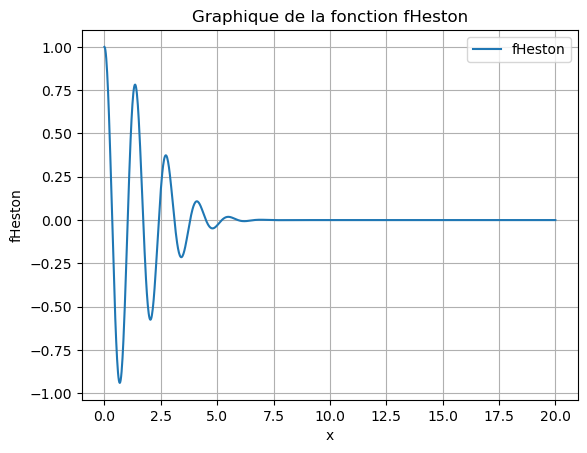

In [10]:
x = np.linspace(0, 20, 1000)

# Calculer les valeurs correspondantes de f(x)
y = fHeston(x,S,K,r,T,rho,sigma, kappa, theta, vol_vol)

# Tracer la fonction
plt.plot(x, y, label='fHeston')
plt.xlabel('x')
plt.ylabel('fHeston')
plt.title('Graphique de la fonction fHeston')
plt.legend()
plt.grid(True)
plt.show()


On peut voir qu'a partir de 20 l'air de fonction ne change plus ainsi prendre une limite à 100 pour l'intégrale est un choix tres tres safe

In [15]:
#QuantPy Code afin de check le rslt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.optimize import minimize 
from datetime import datetime as dt


def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    
    # constants
    a = kappa*theta
    b = kappa+lambd
    
    # common terms w.r.t phi
    rspi = rho*sigma*phi*1j
    
    # define d parameter given phi and b
    d = np.sqrt( (rho*sigma*phi*1j - b)**2 + (phi*1j+phi**2)*sigma**2 )
    
    # define g parameter given phi, b and d
    g = (b-rspi+d)/(b-rspi-d)
    
    # calculate characteristic function by components
    exp1 = np.exp(r*phi*1j*tau)
    term2 = S0**(phi*1j) * ( (1-g*np.exp(d*tau))/(1-g) )**(-2*a/sigma**2)
    exp2 = np.exp(a*tau*(b-rspi+d)/sigma**2 + v0*(b-rspi+d)*( (1-np.exp(d*tau))/(1-g*np.exp(d*tau)) )/sigma**2)

    return exp1*term2*exp2

def integrand(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K*heston_charfunc(phi,*args)
    denominator = 1j*phi*K**(1j*phi)
    return numerator/denominator


def heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    
    P, umax, N = 0, 100, 10000
    dphi=umax/N #dphi is width

    for i in range(1,N):
        # rectangular integration
        phi = dphi * (2*i + 1)/2 # midpoint to calculate height
        numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K * heston_charfunc(phi,*args)
        denominator = 1j*phi*K**(1j*phi)
        
        P += dphi * numerator/denominator
        
    return np.real((S0 - K*np.exp(-r*tau))/2 + P/np.pi)

def heston_price_Quantpy(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    
    real_integral, err = np.real( quad(integrand, 0, 100, args=args) )
    
    return (S0 - K*np.exp(-r*tau))/2 + real_integral/np.pi

In [20]:
import numpy as np
# Parallel computation using numba
from numba import jit, njit, prange 
from numba import cuda
i = complex(0,1)
# To be used in the Heston pricer
@jit
def fHeston_internet(s, St, K, r, T, sigma, kappa, theta, volvol, rho):
    # To be used a lot
    prod = rho * sigma *i *s 
    
    # Calculate d
    d1 = (prod - kappa)**2
    d2 = (sigma**2) * (i*s + s**2)
    d = np.sqrt(d1 + d2)
    
    # Calculate g
    g1 = kappa - prod - d
    g2 = kappa - prod + d
    g = g1/g2
    
    # Calculate first exponential
    exp1 = np.exp(np.log(St) * i *s) * np.exp(i * s* r* T)
    exp2 = 1 - g * np.exp(-d *T)
    exp3 = 1- g
    mainExp1 = exp1*np.power(exp2/exp3, -2*theta*kappa/(sigma **2))
    
    # Calculate second exponential
    exp4 = theta * kappa * T/(sigma **2)
    exp5 = volvol/(sigma **2)
    exp6 = (1 - np.exp(-d * T))/(1 - g * np.exp(-d * T))
    mainExp2 = np.exp((exp4 * g1) + (exp5 *g1 * exp6))
    
    return (mainExp1 * mainExp2)
# Heston Pricer (allow for parallel processing with numba)
@jit(forceobj=True)
def priceHestonMid_internet(St, K, r, T, sigma, kappa, theta, volvol, rho):
    P, iterations, maxNumber = 0,1000,100
    ds = maxNumber/iterations
    
    element1 = 0.5 * (St - K * np.exp(-r * T))
    
    # Calculate the complex integral
    # Using j instead of i to avoid confusion
    for j in prange(1, iterations):
        s1 = ds * (2*j + 1)/2
        s2 = s1 - i
        
        numerator1 = fHeston_internet(s2,  St, K, r, T, 
                             sigma, kappa, theta, volvol, rho)
        numerator2 = K * fHeston_internet(s1,  St, K, r, T, 
                              sigma, kappa, theta, volvol, rho)
        denominator = np.exp(np.log(K) * i * s1) *i *s1
        
        P = P + ds *(numerator1 - numerator2)/denominator
    
    element2 = P/np.pi
    
    return np.real((element1 + element2))

In [27]:
# Define characteristic functions
def heston_characteristic_function(u, S0, K, r, T, kappa, theta, sigma, rho, v0):
   xi = kappa - rho * sigma * 1j * u
   d = np.sqrt((rho * sigma * 1j * u - xi)**2 - sigma**2 * (-u * 1j - u**2))
   g = (xi - rho * sigma * 1j * u - d) / (xi - rho * sigma * 1j * u + d)
   C = r * 1j * u * T + (kappa * theta) / sigma**2 * ((xi - rho * sigma * 1j * u - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g)))
   D = (xi - rho * sigma * 1j * u - d) / sigma**2 * ((1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T)))
   return np.exp(C + D * v0 + 1j * u * np.log(S0))

# Define functions to compute call and put options prices
def heston_call_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
   integrand = lambda u: np.real(np.exp(-1j * u * np.log(K)) / (1j * u) * heston_characteristic_function(u - 1j, S0, K, r, T, kappa, theta, sigma, rho, v0))
   integral, _ = quad(integrand, 0, np.inf)
   return np.exp(-r * T) * 0.5 * S0 - np.exp(-r * T) / np.pi * integral


def heston_put_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
   integrand = lambda u: np.real(np.exp(-1j * u * np.log(K)) / (1j * u) * heston_characteristic_function(u - 1j, S0, K, r, T, kappa, theta, sigma, rho, v0))
   integral, _ = quad(integrand, 0, np.inf)
   return np.exp(-r * T) / np.pi * integral - S0 + K * np.exp(-r * T)

#### Check de spread entre $C_{BS}$ et $C_{Heston}$

C:\Users\cleme\AppData\Local\Temp\ipykernel_17212\2198371987.py:27: RuntimeWarning: divide by zero encountered in log
  exp1 = np.exp(np.log(S) * i *x) * np.exp(i * x*r*T)
C:\Users\cleme\AppData\Local\Temp\ipykernel_17212\2198371987.py:27: RuntimeWarning: invalid value encountered in multiply
  exp1 = np.exp(np.log(S) * i *x) * np.exp(i * x*r*T)


ValueError: x and y must have same first dimension, but have shapes (200,) and (400,)

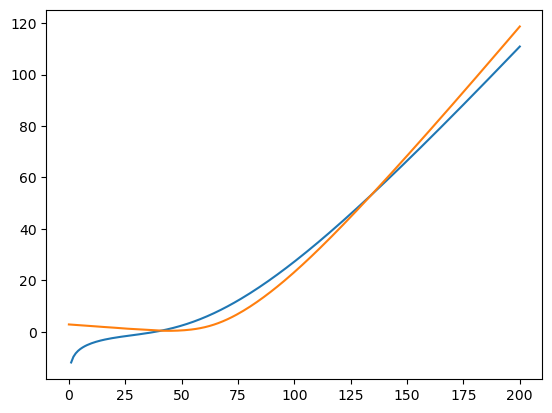

In [29]:
x = np.linspace(0, 200, 200)

# Calculer les valeurs correspondantes de f(x)
y1 = price_Heston(x,K,r,T,rho,sigma, kappa, theta, vol_vol)
# y5= priceHestonMid_internet(x,K,r,T, sigma, kappa, theta, vol_vol, rho)
y2 = []
# y3 = []
# y4 = []
for i in range(1,201):
	Udl = MarketData(i, 0.25, 0.05, 0.2)
	y2.append(heston_price_Quantpy(i,K,sigma, kappa, theta, vol_vol, rho, 0, T,r))
	y3.append(CallOption(Udl, K, T).price())
	# y4.append(heston_call_price(i,K,r,T,kappa,theta,vol_vol,rho,sigma))

# Tracer la fonction
plt.plot(x, y1, label='$C_{Heston}$')
plt.plot(x, y2, label='Quantpy')
# plt.plot(x, y4, label='Internet')
# plt.plot(x, y5, label='Internet2')
plt.plot(x, y3, label='$C_{BS}$')
plt.xlabel('Spot')
plt.ylabel('Price')
plt.title('Spread de prix $C_{BS}$ vs $C_{Heston}$')
plt.legend()
plt.show()

L'écart de prix est OK sachant que j'ai prix des params au hasard.Logiquement si je modifie mes paramètres je peux avoir le meme résultat que black&Scholes

In [ ]:
kappa = 1
vol_vol = 0.0
theta = sigma
x = np.linspace(0, 200, 200)

# Calculer les valeurs correspondantes de f(x)
y1 = price_Heston(x,K,r,T,rho,sigma, kappa, theta, vol_vol)
y2 = []
for i in range(1,201):
	Udl = MarketData(i, 0.25, 0.05, 0.2)
	prix_BS = CallOption(Udl, K, T).price()
	y2.append(prix_BS)

# Tracer la fonction
plt.plot(x, y1, label='$C_{Heston}$')
plt.plot(x, y2, label='$C_{BS}$')
plt.xlabel('Spot')
plt.ylabel('Price')
plt.title('Spread de prix $C_{BS}$ vs $C_{Heston}$')
plt.legend()
plt.grid(True)
plt.show()

# <span style="color:red">***Comme ça marche pas j'ai sans doute un problème quelque part ou alors j'ai mal compris mon modèle et ai mit les mauvais param à 0. De plus il me génère des prix négatif pour des spots < K***</span>

## Calibration du Modèle

Maintenant que nous savons pricer un call avec la formule fermé de Heston nous allons réduire $\epsilon$. Un point important à noté et que nos paramètres de heston doivent servir à pricer l'ensemble de ma nap de vol. si jamais je split ma nap de vol en différente paramètre d'heston je ne pourrais plus aggrégé les grecques. 

### Création de la nap de prix

In [ ]:
df = load_VI(r".\Data\Nap_Vol_SX5E.json")
r = load_rate(r".\Data\RateFr.json")
Udl = MarketData(Spot=100, Vol=df, Taux=r, Div=0.03)
df = Udl.Vol
Udl.Vol

,30,40,50,65,80,90,100,120,150,200
30,0.761244,0.761244,0.675985,0.511070,0.332453,0.210529,0.112958,0.173090,0.324390,0.362706
90,0.593664,0.577868,0.491955,0.368819,0.247037,0.172674,0.120722,0.126750,0.190933,0.276417
180,0.550059,0.477178,0.408221,0.312810,0.224714,0.172668,0.133132,0.118757,0.149377,0.216371
365,0.461395,0.399217,0.344178,0.273135,0.212187,0.177275,0.148911,0.125466,0.133774,0.161080
730,0.385877,0.336358,0.294272,0.241999,0.199474,0.176289,0.157459,0.137213,0.133585,0.145006
1095,0.357771,0.315469,0.279095,0.232932,0.196034,0.176688,0.161224,0.143605,0.138330,0.145220
1460,0.345359,0.306229,0.271684,0.228053,0.194280,0.176969,0.163420,0.147600,0.142113,0.148391
1825,0.340537,0.301371,0.267504,0.225342,0.193494,0.177640,0.165442,0.150636,0.144631,0.149312
2555,0.339499,0.301477,0.269123,0.229593,0.200348,0.186040,0.175260,0.161638,0.153910,0.155602
3650,0.340017,0.305174,0.275947,0.240914,0.214776,0.201894,0.192065,0.179204,0.170274,0.168168


Je dois donc mtn la transformer en nap de prix.

In [ ]:
Udl = MarketData(200,0.25,0.05,0)
Call = CallOption(Udl,100,2)

vecteur_prix = np.array(df.columns/100 * Udl.Spot)
vecteur_mat = np.array([mat/360 if mat < 360 else mat/365 for mat in df.index])
new_df = pd.DataFrame(index=vecteur_mat, columns =vecteur_prix)

for compteur, i in enumerate(df.index):
	Udl.Taux = Udl.get_rate(vecteur_mat[compteur])
	Call.T = vecteur_mat[compteur]
	for comp, j in enumerate(df.columns):
		Udl.Vol = df.loc[i,j]
		Call.K = vecteur_prix[comp]
		new_df.iloc[compteur, comp] = Call.price()
new_dfLong = new_df.melt(ignore_index = False).reset_index()
new_dfLong.columns = ['maturity', 'strike', 'price']
maturities = new_dfLong['maturity'].to_numpy('float')
strikes = new_dfLong['strike'].to_numpy('float')
marketPrices = new_dfLong['price'].to_numpy('float')
new_df

,60.0,80.0,100.0,130.0,160.0,180.0,200.0,240.0,300.0,400.0
0.083333,140.24948,120.332724,100.416995,70.551397,40.716452,20.911749,3.033197,0.000491,0.000044,0.0
0.250000,140.745479,121.000092,101.26293,71.694082,42.225084,22.879871,6.129898,0.015626,0.000098,0.000003
0.500000,141.490302,122.008013,102.552164,73.462348,44.662509,26.114958,10.144476,0.214982,0.00099,0.000056
1.000000,142.974433,124.02554,105.134357,77.012706,49.528137,32.2102,17.10342,2.008184,0.038864,0.000327
2.000000,145.864608,127.940059,110.115631,83.725025,58.214473,42.291752,28.069421,8.965151,0.979708,0.030537
3.000000,148.666546,131.745045,114.947174,90.106,66.124963,51.121959,37.4766,17.003732,3.973928,0.359525
4.000000,151.384094,135.413292,119.544174,96.052102,73.359437,59.097528,45.967945,25.056468,8.607122,1.511763
5.000000,154.022555,138.918538,123.893218,101.617234,80.066825,66.480753,53.865197,32.932856,14.154962,3.54465
7.000000,159.01948,145.536928,132.093756,112.131519,92.789441,80.534327,69.033024,49.016232,27.787319,10.932338
10.000000,165.595924,154.236234,142.888336,126.037449,109.659044,99.220859,89.312565,71.449386,50.162567,28.043035


In [ ]:
param_vol_sto = {"rho":     {"x0": -0.8, "lbub": [-1,0]},
				 "sigma":   {"x0": 0.1,  "lbub": [1e-3,0.1]}, 
				 "kappa":   {"x0": 3,    "lbub": [1e-3,5]},
				 "theta":   {"x0": 0.05, "lbub": [1e-3,0.1]},
				 "vol_vol": {"x0": 0.3,  "lbub": [1e-2,1]}}
param_ini = [param["x0"] for _, param in param_vol_sto.items()]
bnds = [param["lbub"] for _, param in param_vol_sto.items()]
df_price = new_df.melt(ignore_index = False).reset_index()
df_price.columns = ['Maturity', 'Strike', 'Price']

def calibration_Heston(param_ini):
	rho,sigma,kappa,theta,vol_vol= [param for param in param_ini]
	
	array_price_heston = price_Heston(200, df_price["Strike"].to_numpy(float), 0.05, df_price["Maturity"].to_numpy(float), rho,sigma,kappa,theta,vol_vol)
	err = np.sum((df_price["Price"].to_numpy(float) - array_price_heston)**2)/len(df_price["Price"])
	pen = 0
	return err + pen

In [7]:
result = minimize(calibration_Heston, param_ini, tol = 1e-2, method='SLSQP', options={'maxiter': 100 }, bounds=bnds)
v0, kappa, theta, sigma, rho = [param for param in result.x]
v0, kappa, theta, sigma, rho

NameError: name 'calibration_Heston' is not defined

In [ ]:
from scipy.integrate import quad

def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    
    # constants
    a = kappa*theta
    b = kappa+lambd
    
    # common terms w.r.t phi
    rspi = rho*sigma*phi*1j
    
    # define d parameter given phi and b
    d = np.sqrt( (rho*sigma*phi*1j - b)**2 + (phi*1j+phi**2)*sigma**2 )
    
    # define g parameter given phi, b and d
    g = (b-rspi+d)/(b-rspi-d)
    
    # calculate characteristic function by components
    exp1 = np.exp(r*phi*1j*tau)
    term2 = S0**(phi*1j) * ( (1-g*np.exp(d*tau))/(1-g) )**(-2*a/sigma**2)
    exp2 = np.exp(a*tau*(b-rspi+d)/sigma**2 + v0*(b-rspi+d)*( (1-np.exp(d*tau))/(1-g*np.exp(d*tau)) )/sigma**2)
    return exp1*term2*exp2

def integrand(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K*heston_charfunc(phi,*args)
    denominator = 1j*phi*K**(1j*phi)
    return numerator/denominator

def heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    
    P, umax, N = 0, 100, 10000
    dphi=umax/N #dphi is width
    for i in range(1,N):
        # rectangular integration
        phi = dphi * (2*i + 1)/2 # midpoint to calculate height
        numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K * heston_charfunc(phi,*args)
        denominator = 1j*phi*K**(1j*phi)
        
        P += dphi * numerator/denominator
        
    return np.real((S0 - K*np.exp(-r*tau))/2 + P/np.pi)

def heston_price(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    real_integral, err = np.real( quad(integrand, 1, 100, args=args) )
    
    return (S0 - K*np.exp(-r*tau))/2 + real_integral/np.pi

In [ ]:
x = np.linspace(1, 200, 200)

# Calculer les valeurs correspondantes de f(x)
y1 = price_Heston(x,K,r,T,rho,sigma, kappa, theta, vol_vol)
y2 = []
for w in range(1,201):
	prix = heston_price_rec(w,K,sigma,kappa, theta, vol_vol, rho,0,T,r)
	y2.append(prix)
y3 = []
for w in range(1,201):
	prix = heston_price(w,K,sigma,kappa, theta, vol_vol, rho,0,T,r)
	y3.append(prix)

# Tracer la fonction
plt.plot(x, y1, label='$C_{Heston}$')
plt.plot(x, y2, label='$C_{Heston quantpy}$')
plt.plot(x, y3, label='$C_{Heston2 quantpy}$')
plt.xlabel('Spot')
plt.ylabel('Price')
plt.title('Spread de prix $C_{BS}$ vs $C_{Heston}$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# This is the calibration function
# heston_price(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r)
# Parameters are v0, kappa, theta, sigma, rho, lambd
# Define variables to be used in optimization
S0 = 200
r = 0.05
K = new_dfLong['strike'].to_numpy('float')
tau = new_dfLong['maturity'].to_numpy('float')
P = new_dfLong['price'].to_numpy('float')
params = {"v0": {"x0": 0.1, "lbub": [1e-3,0.1]}, 
          "kappa": {"x0": 3, "lbub": [1e-3,5]},
          "theta": {"x0": 0.05, "lbub": [1e-3,0.1]},
          "sigma": {"x0": 0.3, "lbub": [1e-2,1]},
          "rho": {"x0": -0.8, "lbub": [-1,0]},
          "lambd": {"x0": 0.03, "lbub": [-1,1]},
          }
x0 = [param["x0"] for key, param in params.items()]
bnds = [param["lbub"] for key, param in params.items()]
def SqErr(x):
    v0, kappa, theta, sigma, rho, lambd = [param for param in x]
    
    # Attempted to use scipy integrate quad module as constrained to single floats not arrays
    # err = np.sum([ (P_i-heston_price(S0, K_i, v0, kappa, theta, sigma, rho, lambd, tau_i, r_i))**2 /len(P) \
    #               for P_i, K_i, tau_i, r_i in zip(marketPrices, K, tau, r)])
    
    # Decided to use rectangular integration function in the end
    err = np.sum( (P-heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r))**2 /len(P) )
    
    # Zero penalty term - no good guesses for parameters
    pen = 0 #np.sum( [(x_i-x0_i)**2 for x_i, x0_i in zip(x, x0)] )
          
    return err + pen
result = minimize(SqErr, x0, tol = 1e-3, method='SLSQP', options={'maxiter': 1e4 }, bounds=bnds)
v0, kappa, theta, sigma, rho, lambd = [param for param in result.x]
v0, kappa, theta, sigma, rho, lambd

In [ ]:
v0, kappa, theta, sigma, rho, lambd = [param for param in result.x]
y2 = []
for w in range(1,201):
	prix = heston_price_rec(w,K,v0,kappa, theta, sigma, rho,lambd,T,r)
	y2.append(prix)


# Tracer la fonction
plt.plot(x, y2, label='$C_{Heston quantpy}$')

plt.xlabel('Spot')
plt.ylabel('Price')
plt.title('Spread de prix $C_{BS}$ vs $C_{Heston}$')
plt.legend()
plt.grid(True)
plt.show()

# **L'optimisation ne marche pas en plus ça me retourne des prix négatifs**